## Importing required libraries

In [1]:
import numpy as np
import numpy as np
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

* __Generate SPD matrix__

In [2]:
#MATRIX PARAMETERS (nxn)
n = 1000
A = make_spd_matrix(n,random_state=0)

# eigenvalues and eigenvectors | # eig_val[i] ==> corr. eig_vec[:,i]
eig_val, eig_vec = np.linalg.eig(A)
# eig_val, eig_vec

## Deterministic Power method 

### 1) Without momentum

In [3]:
#Initialization
np.random.seed(0)
x = np.random.rand(A.shape[0])

#dominant eigenvector
u1 = eig_vec[:,0]

#max iterations
max_iters=10000

def det_power(A, x, max_iters, u1):
    
    x /= np.linalg.norm(x,2)
    res = []
    res.append(1 - (x.dot(u1))**2)
    for i in range(max_iters):

        # update equation for power iteration without momentum
        x = A@x

        #scaling
        x /= np.linalg.norm(x,2)

        #residual
        res.append(1 - (x.dot(u1))**2)
#     print(f'Eigenvector: {x}')
    return res

Res_det_power = det_power(A, x, max_iters, u1)

### 2) With momentum

In [4]:
#Initialization
np.random.seed(0)
x0 = np.random.rand(A.shape[0])

#momentum
beta = (eig_vec[1]**2)/4

#dominant eigenvector
u1 = eig_vec[:,0]

#max iterations
max_iters=10000

def det_power_with_mom(A, x0, beta, max_iters, u1):
    
        x0 /= np.linalg.norm(x0,2)
        x = x0
        x0 = 0
        res = []
        res.append(1 - (x.dot(u1))**2)
        for i in range(max_iters):
            
            # update equation for power iteration with momentum
            x, x0 = A@x - beta*x0, x
            
            #scaling
            z = np.linalg.norm(x,2)
            x /= z
            x0 /= z
            
            #residual
            res.append(1 - (x.dot(u1))**2)
#         print(f'Eigenvector: {x}')
        return res
    
Res_det_power_with_mom = det_power_with_mom(A, x0, beta, max_iters, u1)

## Stochastic power method with momentum

In [5]:
#Initialization
np.random.seed(0)
x0 = np.random.rand(A.shape[0])

#momentum
beta = (eig_vec[1]**2)/4

#dominant eigenvector
u1 = eig_vec[:,0]

def stoc_power_with_mom(A, u1, n_samples, batch_size, max_iters, beta):
    x = np.random.rand(A.shape[0])
    x = x/np.linalg.norm(x,2)
    x0 = 0
    res = []
    res.append(1 - (x.dot(u1))**2)
    for i in range(max_iters):
        batch_id = np.random.choice(n_samples, batch_size)
        batch = A[batch_id, :]
        x, x0 = 1.0 / batch_size * batch.T.dot(batch.dot(x)) - beta * x0, x

        z = np.linalg.norm(x,2)
        x /= z
        x0 /= z
        res.append(1 - (x.dot(u1))**2)
#     print(f'Eigenvector: {x}')
    return res
Res_stoc_power_with_mom = stoc_power_with_mom(A, u1, n_samples=A.shape[0], batch_size=A.shape[0], max_iters=10000, beta=beta)

# Convergence Plots

* __Power method__ 

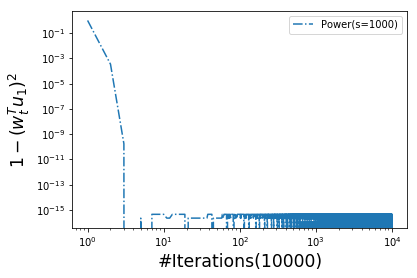

In [12]:
plt.plot(range(1,max_iters+2), Res_det_power, label=f'Power(s={A.shape[0]})', linestyle='dashdot')
plt.xlabel(f"#Iterations({max_iters})", fontsize = 'xx-large')
plt.ylabel(r"$1 - (w_t^Tu_1)^2$", fontsize = 'xx-large')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

* __Power method with momentum__ 

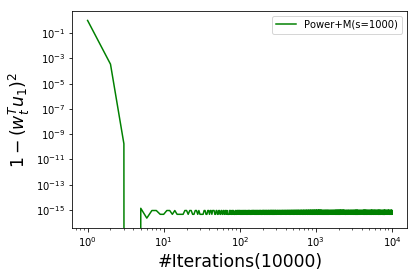

In [13]:
plt.plot(range(1,max_iters+2), Res_det_power_with_mom, label=f'Power+M(s={A.shape[0]})',color='g')
plt.xlabel(f"#Iterations({max_iters})", fontsize = 'xx-large')
plt.ylabel(r"$1 - (w_t^Tu_1)^2$", fontsize = 'xx-large')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

* __Stochastic Power method with momentum__ 

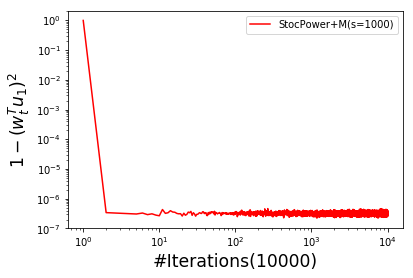

In [14]:
plt.plot(range(1,max_iters+2), Res_stoc_power_with_mom,label=f'StocPower+M(s={A.shape[0]})',color='r')
plt.xlabel(f"#Iterations({max_iters})", fontsize = 'xx-large')
plt.ylabel(r"$1 - (w_t^Tu_1)^2$", fontsize = 'xx-large')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

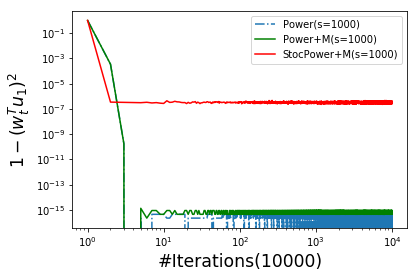

In [17]:
plt.plot(range(1,max_iters+2), Res_det_power, label=f'Power(s={A.shape[0]})', linestyle='dashdot')
plt.plot(range(1,max_iters+2), Res_det_power_with_mom, label=f'Power+M(s={A.shape[0]})',color='g')
plt.plot(range(1,max_iters+2), Res_stoc_power_with_mom,label=f'StocPower+M(s={A.shape[0]})',color='r')
plt.xlabel(f"#Iterations({max_iters})", fontsize = 'xx-large')
plt.ylabel(r"$1 - (w_t^Tu_1)^2$", fontsize = 'xx-large')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()